In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
dataset  = pd.read_excel('/content/Superstore_USA.xlsx')

In [28]:
dataset.head(10)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523
5,23597,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-11-09,2011-11-11,1388.0523,37,2011.67,88524
6,25549,Low,0.08,120.97,26.30,3,Bonnie Potter,Delivery Truck,Corporate,Technology,...,West,Washington,Anacortes,98221,2013-07-01,2013-07-08,1001.4453,12,1451.37,88526
7,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2010-12-13,2010-12-15,4390.3665,12,6362.85,90193
8,19483,Low,0.08,6.48,6.81,5,Ronnie Proctor,Regular Air,Home Office,Office Supplies,...,West,California,San Gabriel,91776,2012-05-12,2012-05-21,-141.2600,18,113.25,90197
9,24782,High,0.01,90.24,0.99,6,Dwight Hwang,Regular Air,Home Office,Office Supplies,...,West,California,San Jose,95123,2011-05-26,2011-05-26,1045.4673,16,1515.17,90194


In [29]:
dataset.shape

(9426, 24)

As we can see, There are 9426 Rows and 24 Columns, Now we will find Missing values.

In [30]:
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


As we can see there are 72 Null values in Product Base Margin Column, As we can see its a Numerical column , therefore we fill fill blank column with mean

In [31]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

<ipython-input-31-416cfbce15de>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)


In [32]:
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


## As we can see, we have successfully filled missing values in the  column with mean value.

Now we will do Univariate Analysis on Order Priority where we will check no. of products from each priority

In [33]:
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1804
Critical,1


As we can check different Order priority from low to critical. Here High priority product orders are highest in count of 1970 and Critical priority is lowest in count of only 1804. but here is one problem, where there are two critical priority. first we will solve this. we will do some data cleaning

In [34]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [35]:
dataset['Order Priority'].replace('Critical ','Critical',inplace=True)

<ipython-input-35-a819f86dd22e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Order Priority'].replace('Critical ','Critical',inplace=True)


In [36]:
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1805


### Now we have solved the problem of two same order priority by doing some data cleaning by running some command above.

# Now we will do some graphical analysis

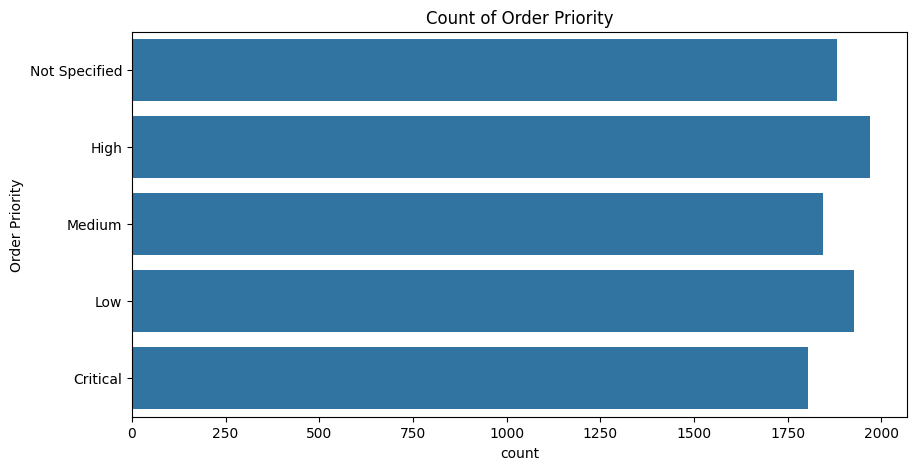

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Order Priority'])
plt.title('Count of Order Priority')

#plt.savefig('countplotOrderPriority.png') to download in pc


plt.show()
#for vertical view
#sns.countplot(x='Order Priority',data = dataset)



## Now we will see detail insights of Ship mode

In [38]:
dataset['Ship Mode'].value_counts()

,count
Ship Mode,
Regular Air,7036
Delivery Truck,1283
Express Air,1107


## Here we can see there are three shipping mode and there respective counts. now we will see graphically.

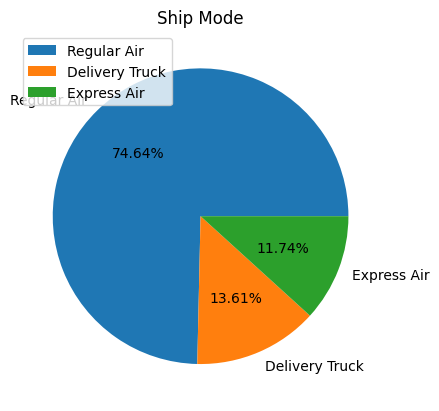

In [39]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.title('Ship Mode')
plt.legend(loc=2)
plt.show()

## Now we will see the combined analysis of ship mode and product category.

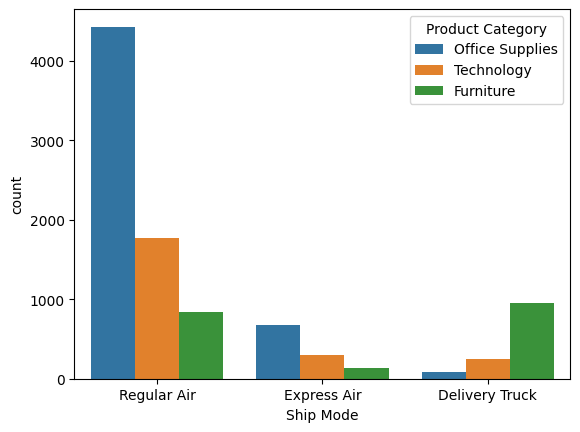

In [40]:
sns.countplot(x='Ship Mode',hue='Product Category',data=dataset)
plt.show()

## From above we can retrieve important insights from data.

## Now we will do some analysis on Customer Segment

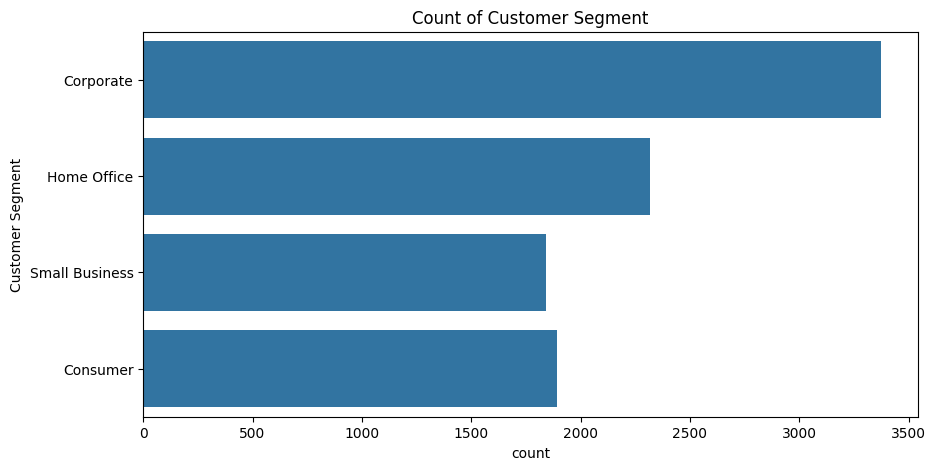

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Customer Segment'])
plt.title('Count of Customer Segment')
plt.show()

In [42]:
dataset['Customer Segment'].value_counts()

,count
Customer Segment,
Corporate,3375
Home Office,2316
Consumer,1894
Small Business,1841


As per the Numerical data and graphical representatiom we can see the  demand of the product of corporate Segment is high and the Small Bussiness Segment is low as compared to other.


# Product Category

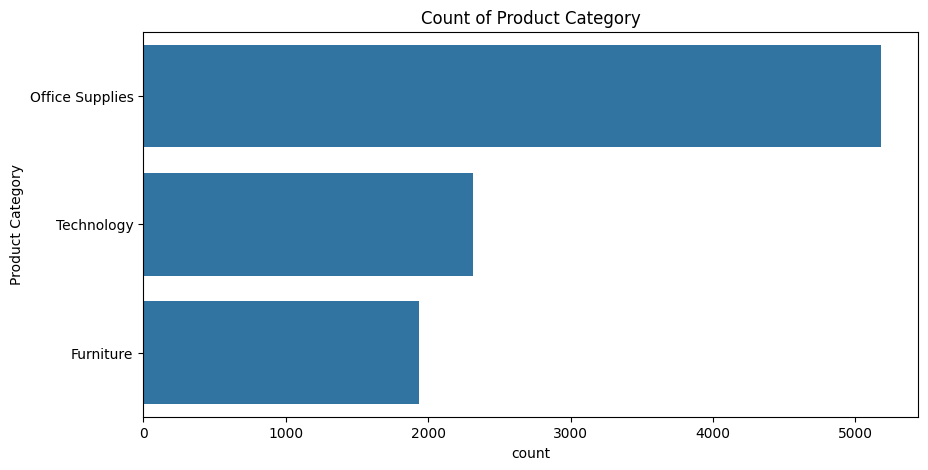

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Product Category'])
plt.title('Count of Product Category')
plt.show()

From above graphical representation we can see that the sales of office Supplies is highest among the three Category where sales of Technology product and furniture is similary as small sales difference and both the category has less than half sales as compared to office Supplies.

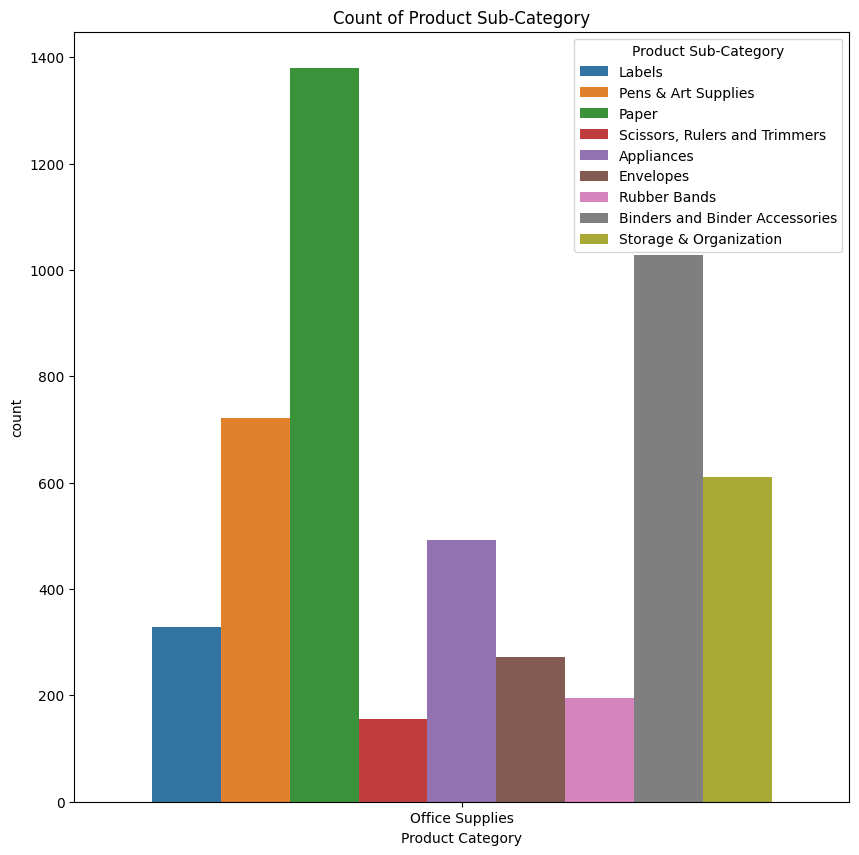

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Product Category", data = dataset[dataset['Product Category']=="Office Supplies"],hue="Product Sub-Category")
plt.title('Count of Product Sub-Category')
plt.show()

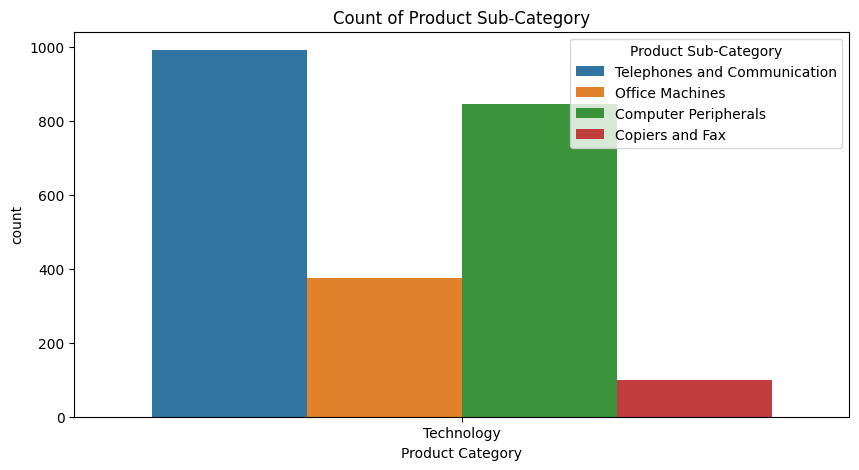

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Product Category", data = dataset[dataset['Product Category']=="Technology"],hue="Product Sub-Category")
plt.title('Count of Product Sub-Category')
plt.show()

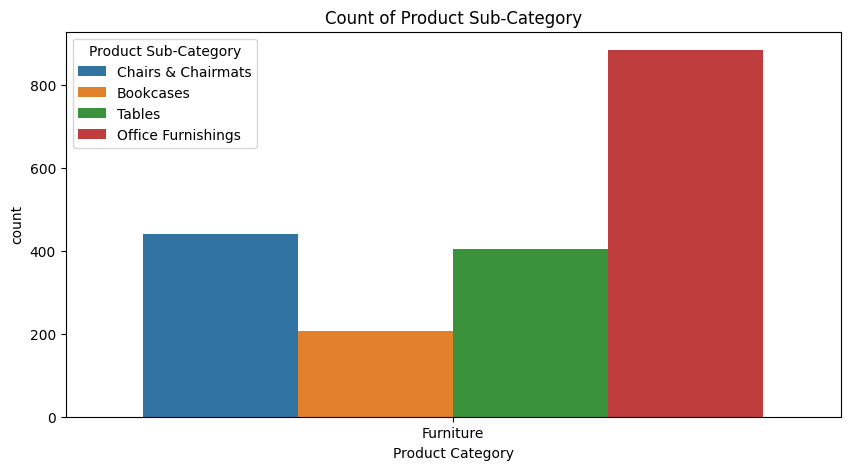

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Product Category", data = dataset[dataset['Product Category']=="Furniture"],hue="Product Sub-Category")
plt.title('Count of Product Sub-Category')
plt.show()

Above is Graphical representation of Sales count Based on Product Sub

## Now we will see Sales counts from  different Timelines

In [47]:
dataset["Order year"]=dataset['Order Date'].dt.year

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [49]:
dataset['Order year'].value_counts()

,count
Order year,
2013,3054
2012,2241
2011,2179
2010,1952


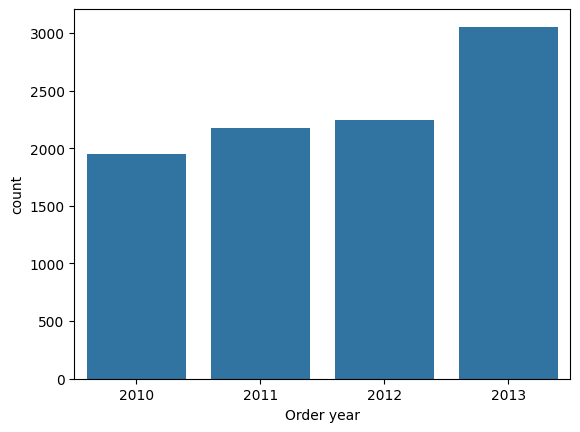

In [50]:
sns.countplot(x='Order year',data=dataset)
plt.show()

As we can see by numerical values and graphical representation, the Sales of Superstore is increasing gradualy year by year from 2010 to 2014.

## Now we will Retrieve important information Categorywise Profit made by Superstore

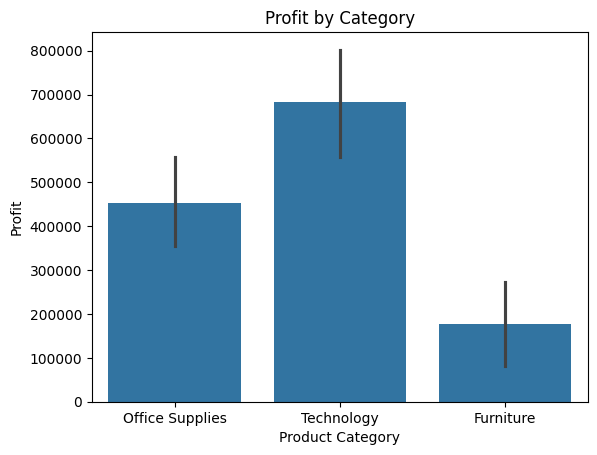

In [53]:
sns.barplot(x='Product Category',y='Profit',data=dataset,estimator='sum')
plt.title('Profit by Category')
plt.show()

Product Category
Furniture          177354.298188
Office Supplies    451990.216492
Technology         683097.884748
Name: Profit, dtype: float64


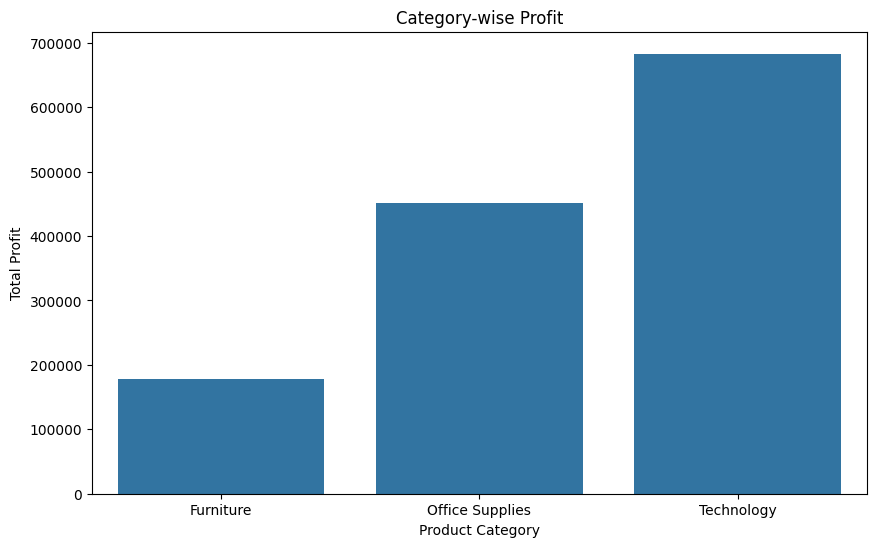

In [54]:
# prompt: categorywise profit

# Calculate and display category-wise profit
category_profit = dataset.groupby('Product Category')['Profit'].sum()
print(category_profit)

# Create a bar plot for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Category-wise Profit')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

Here we can see Technolgy category made highest sales and Furniture category has lowest. Office Supplies made Average sales as compared both the category.

## Now we will See Sales of each State

In [58]:
dataset['State or Province'].value_counts()

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522
Ohio,396
Washington,327
Michigan,327
Pennsylvania,271


In [57]:
dataset['State or Province'].value_counts()[:5]

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522


Here we can see California has highest sales and Delaware has lowest sales.

## Product Base Margin categorywise

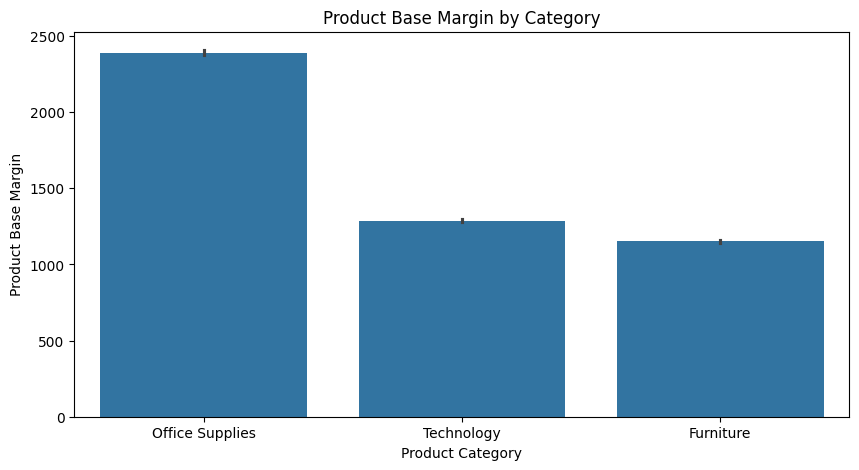

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product Category',y='Product Base Margin',data=dataset,estimator='sum')
plt.title('Product Base Margin by Category')
plt.show()

## Conclusion : We Have analysed the given data and we can see Bussiness has to focus on Furniture segment and Marketing of products on several states whose sales counts are poor.